# Trabajo del Taller de Modelización 
## Mateo Gómez Naval, José Nilton Morales Chávez, Juan Miguel Pose Longueira y Pablo Pérez Picos
### 1. Introducción

Se va a realizar un estudio de algoritmos de machine learning de clasificación. Se usará la base de datos Hipertensión Arterial Mexico Dataset, que se puede encontrar en la dirección Kaggle datasets (https://kaggle.com/datasets). Los algoritmos que vamos a utilizar serán:
- Perceptrón.
- Adeline.
- Logistic Regression.
- Algoritmos de clasificación con la librería Scikit-Learn de Python:
    - Perceptrón.
    - Logistic Regression.
    - Support Cector Machine.
    - Decission Trees.
    - K-Nearest NEighbours.

Además, se tratará de realizar una reducción dimensional y un análisis de modelos y ajuste de hiperparámetros.

Lo primero que haremos será familiarizarnos con la base de datos y ver cuántas características (features) son necesarias para clasificar y cuáles, para así tener una ayuda a la hora de aplicar los algoritmos más adelante.

### 1.1 Base de datos

Como ya se ha comentado, la base de datos es Hipertensión Arterial Mexico Dataset. Consiste en un conjunto de 4362 entradas que relaciona 34 características (features) con el riesgo de padecer hipertensión arterial. Veamos el dataset, para lo que importamos las librerías pandas y numpy.



In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("HipertensionArterialMexico.csv")
df.head()

,FOLIO_I,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total,riesgo_hipertension
0,2022_01001004,2,41,14.2,22,4.8,4.0,34,86.0,139,...,64.70,154.0,48.5,33.5,222.2,107,4,32.889389,120,1
1,2022_01001009,2,65,14.1,9,4.4,3.8,73,130.0,252,...,96.75,152.2,44.5,41.1,113.7,104,2,1.000000,240,0
2,2022_01001012,2,68,14.2,22,4.8,4.0,34,86.0,139,...,68.70,144.8,42.3,37.8,103.7,105,1,1.000000,480,0
3,2022_01001013,1,35,15.7,11,6.5,4.1,49,107.0,203,...,64.70,154.0,48.5,33.5,222.2,117,5,26.265339,275,1
4,2022_01001015,2,65,12.7,7,4.2,4.2,41,76.0,145,...,97.15,161.3,49.6,42.0,118.9,123,2,1.000000,255,0


En la columna de riesgo_hipertensión un valor 0 significa que no hay riesgo y un valor 1 que sí que lo hay. En la columna sexo, un valor 1 corresponde a hombre y un valor 2 a mujer. Comprobemos cuántos valores no válidos hay en cada una de las features.

In [2]:
df.isnull().sum()


FOLIO_I                             0
sexo                                0
edad                                0
concentracion_hemoglobina           0
temperatura_ambiente                0
valor_acido_urico                   0
valor_albumina                      0
valor_colesterol_hdl                0
valor_colesterol_ldl                0
valor_colesterol_total              0
valor_creatina                      0
resultado_glucosa                   0
valor_insulina                      0
valor_trigliceridos                 0
resultado_glucosa_promedio          0
valor_hemoglobina_glucosilada       0
valor_ferritina                     0
valor_folato                        0
valor_homocisteina                  0
valor_proteinac_reactiva            0
valor_transferrina                  0
valor_vitamina_bdoce                0
valor_vitamina_d                    0
peso                                0
estatura                            0
medida_cintura                      0
segundamedic

Veamos ahora cuántos casos hay con riesgo de padecer hipertensión arterial y cuántos no.

In [3]:
y=df.iloc[0:, -1].values
print('Class labels:', np.unique(y)) # comprobamos que los datos son únicamente 0 y 1
aux=0 # iniciamos un contador para los casos que no son de riesgo
for i in range(len(y)):
    if y[i]==0:
        aux+=1
print('Riesgo= ',len(y)-aux)
print('No riesgo= ', aux)

Class labels: [0 1]
Riesgo=  2816
No riesgo=  1547


Vamos a comprobar ahora cuántas features hacen falta para diagnosticar el riesgo de hipertensión y con cuánta precisión se hace. Lo primero que haremos será dividir los casos en 2 grupos: uno de entrenamiento y otro de prueba (test). Para ello haremos uso de la función train_test_split de la librería sklearn.model_selection. La opción stratify=y asegura que la proporción de casos con riesgo y sin riesgo se mantenga constante en los 2 grupos. En este caso trabajaremos con un grupo de test con un tamaño de 0.3 del original.

Destacar que __la primera columna no es una característica__, simplemente es un orden de los casos que sigue el dataset; por lo tanto, al crear la matriz con las features __no la tenemos en cuenta__.

In [4]:
X= df.iloc[0:, 1:-1].values # Creamos la matriz con las features
y=df.iloc[0:, -1].values
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3,
                     random_state=0,
                     stratify=y)
# Comporbemos que se mantienen las proporciones de casos con riesgo y casos sin riesgo.
# Comencemos con el caso original
aux=0 # iniciamos un contador para los casos que no son de riesgo
for i in range(len(y)):
    if y[i]==0:
        aux+=1
proporcion_original=aux/(len(y)-aux)

# Pasemos al conjunto de entrenamiento
aux=0 # iniciamos un contador para los casos que no son de riesgo
for i in range(len(y_train)):
    if y_train[i]==0:
        aux+=1
proporcion_train=aux/(len(y_train)-aux)

# Acabamos con el conjunto de test
aux=0 # iniciamos un contador para los casos que no son de riesgo
for i in range(len(y_test)):
    if y_test[i]==0:
        aux+=1
proporcion_test=aux/(len(y_test)-aux)

print('Proporciones= ',[proporcion_original,proporcion_train,proporcion_test])

Proporciones=  [0.5493607954545454, 0.5494672754946728, 0.5491124260355029]


Vemos que las proporciones se mantienen prácticamente constantes. Estandaricemos los datos con la función StandardScaler de la librería sklearn.preprocessing. 

In [5]:
from sklearn.preprocessing import StandardScaler
stdc = StandardScaler()
X_train_std = stdc.fit_transform(X_train)
X_test_std = stdc.fit_transform(X_test)
# Acabamos la estandarización de los datos

Para ver cuántas características son necesarias utilizaremos el algoritmo SBS (Sequential Backward Selection) poniéndolo a prueba con un clasificador llamado KNeighbors, en concreto, la clase KNeighborsClassifier que se obtiene a partir de la librería sklearn.neighbors.

A continuación se crea una clase SBS con un código Sebastian Raschka y coautores que implementa a mano un algoritmo de este tipo.

In [6]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS:
    def __init__(self, estimator, k_features,
                 scoring = accuracy_score,
                 test_size = 0.3, random_state =1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size= self.test_size,
                             random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r= dim - 1):
                score = self._calc_score(X_train, y_train,
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
                
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            self.scores_.append(scores[best])
        self.k_score = self.scores_[-1]
        
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

Visualización de la contribución del número de features a la precisión, usando los datos de validación.

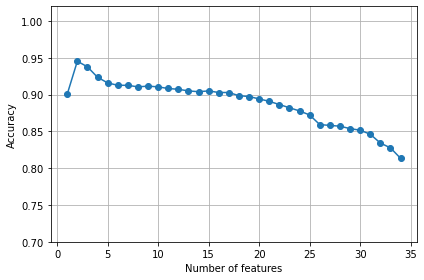

In [7]:
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

Vemos que el máximo de precisión se alcanza con tan solo 2 características y roza el 95%. ¿Cuáles son?

In [8]:
k2 = list(sbs.subsets_[32]) # 2 menos que el número total de características
print(df.columns[1:][k2])

Index(['masa_corporal', 'actividad_total'], dtype='object')


De forma alternativa, se puede emplear la librería Scikit-Learn para seleccionar las features utilizando la clase RandomForestClassifier del módulo sklearn.ensemble. Para ello, entrenaremos un bosque con 500 árboles de decisión y se calsificarán las características por su importancia de mayor a menor.


 1) masa_corporal                  0.282290
 2) actividad_total                0.137564
 3) tension_arterial               0.129092
 4) peso                           0.101037
 5) medida_cintura                 0.069828
 6) edad                           0.055384
 7) segundamedicion_cintura        0.030772
 8) estatura                       0.024857
 9) circunferencia_de_la_pantorrilla 0.023033
10) segundamedicion_peso           0.019580
11) distancia_rodilla_talon        0.012687
12) segundamedicion_estatura       0.011084
13) valor_colesterol_ldl           0.009693
14) valor_colesterol_total         0.009136
15) valor_trigliceridos            0.008890
16) valor_insulina                 0.006499
17) concentracion_hemoglobina      0.006066
18) sueno_horas                    0.005767
19) resultado_glucosa              0.005715
20) valor_colesterol_hdl           0.005555
21) resultado_glucosa_promedio     0.005023
22) valor_hemoglobina_glucosilada  0.004910
23) valor_creatina            

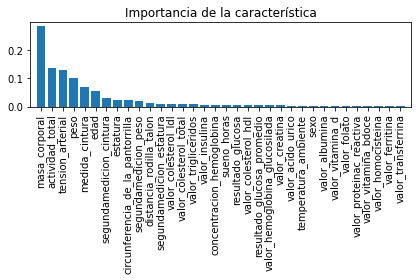

In [9]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df.columns[1:]
forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                           feat_labels[indices[f]],
                           importances[indices[f]]))
plt.title('Importancia de la característica')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align = 'center')
plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

Por lo tanto, las 2 features más importantes para nuestro trabajo serán la masa corporal y la actividad total (ambos métodos coinciden en ello).

### 2. Aplicación de los distintos calsificadores
### 2.1 Perceptrón

Comencemos el estudio de los algoritmos de calsificación viendo lo que es capaz de realizar el perceptrón. A continuación creamos la clase perceptrón.

In [10]:
import numpy as np

class Perceptron:
    """Clasificador Perceptron (Perceptron classifier).
    
    Parámetros (Parameters)
    ------------------------
    eta : float
        Tasa de aprendizaje (Learning rate) (entre 0.0 y 1.0)
      
    n_iter : int
        Número de pases sobre el conjunto de datos de entrenamiento
        (Passes over the training dataset).
      
    random_state : int
      Semilla para el generador de números aleatorios
      usado en la inicialización de los pesos 
      (Random number generator seed for random weight initialization).
      
    Atributos (Attributes)
    -----------------------
    
    w_ : 1d-array 
        Pesos tras el ajuste (Weights after fitting).
        
    b_ : Scalar
        Bias unit after fitting.
     
    errors_ : list
        Número de clasificaciones erróneas (actualizaciones) en cada epoch
        (Number of misclassifications (updates) in each epoch).
    
    Procedimientos (Functions)
    ---------------------------
    """
    """
    __init__ : function
        Hace las veces de contructor en C++.
        Siempre lleva el parámetro self y además se ponen los valores de los
        parámetros eta, n_iter y random_state que se toman por defecto.
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1) :
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    """
    fit : function
        Se encarga de hacer el ajuste de los datos de entrenamiento.
        Sus parámetros son: self, la matriz de datos X y el vector de clases y.
        La matriz X tiene por filas los distintos ejemplos de la base de datos
        (consideremos por ejemplo, 150 ejemplos de flores, por tanto X tendrá 150 filas),
        X tiene por columnas las características "features" de cada ejemplo
        (consideremos por ejemplo, sépalos y pétalos, por tanto X tendrá 2 columnas).
        El vector y contiene la etiqueta verdadera a la que pertenecen los ejemplos, 
        por eso son los valores "target". 
        
    """
    
    def fit(self, X, y) :
        """ Fit training data.
        
        Parámetros (Parameters)
        ------------------------ 
        X : (array-like), shape = [n_examples, n_features]
            Training vectors, where n_examples is the number of examples and n_features is the number of features.
        y : (array-like), shape = [n_examples]
            Target values.
            
        Returns
        -------
        self : object
        """
        # A partir de la semilla random_state creamos números aleatorios en rgen
        rgen = np.random.RandomState(self.random_state)
        # Distribuimos en el vector de pesos w_ valores que siguen una distribución normal
        # de media (mean) loc=0.0 y desviación típica (standard deviation) scale=0.01
        # size indica el tamaño del vector w_, en este caso coincide con el número de 
        # columnas de X (dado por X.shape[1]) más 1.
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size= X.shape[1])
        self.b_ = np.float_(0.)
        
        # declare una lista vacía que contendrá los errores de clasificación de etiquetas
        self.errors_ = []
        
            # El primer for se ejecuta n_iter veces
            # Se inicializa a cero errors
            # El for tiene dos indices xi y target. La función zip(X,y) se encarga de que: 
            # En cada ejecución del for, xi es una fila de X y target es el correspondiente valor 
            # a dicha fila que está en el vector columna y.
            
        for _ in range(self.n_iter) :
            errors = 0
            for xi, target in zip(X,y) :
                update = self.eta*(target - self.predict(xi))
                self.w_ += update * xi # cambiamos pesos
                self.b_ += update # cambiamos el bias
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    """
    net_input : function
        Se encarga de calcular el net input correspondiente a cada ejemplo del conjunto de datos.
        Concretamente usa el producto escalar del vector de pesos w con el vector de features x 
        $z = w_0 x_0 + w_1 x_1 + w_2 x_2 + \dots + w_m x_m = \textbf{w}^T \textbf{x}$
        Dado que x_0=1 y que w_0 contiene al -bias, el producto escalar se hace cada fila de X con 
        todos los pesos desde w_1 hasta w_m y luego se añade w_0 = w_0*x_0 = w_0*1
    """
    
    def net_input(self, X) :
        """ Calculate net input """
        return np.dot(X, self.w_) + self.b_
    
    """
     predict : function
         Para cada una de las filas de la matriz X se calcula su correspodiente net input, de forma que
         si net input es >=0, se devuelve el valor +1 (clase positiva) y en otro caso se devuelve -1 
         (clase negativa)
    """
    
    def predict(self, X) :
        """ Return class label after unit step """
        return np.where(self.net_input(X) >= 0.0, 1, 0)


Como ya se comentó en la sección anterior vamos a trabajar con las características de masa corporal y actividad total, para lo que creamos una matriz con los valores estandarizados de estas features.

In [11]:
X_train_std2=X_train_std[:, k2] # Cogemos únicamente las columas que corresponden con las características que queremos.
X_test_std2=X_test_std[:, k2]

Visualicemos los datos. EL eje X se corresponderá con la masa corporal y el Y con la actividad total.

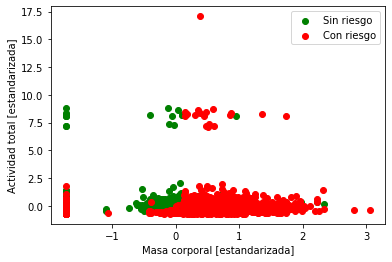

In [12]:
# Tenemos que saber qué filas corresponden con los casos en los que hay riesgo de sufrir hipertensión arterial y cuáles no.
# Creamos 2 listas vacías
riesgo_train_si=[]
riesgo_train_no=[]
for i in range(len(y_train)):
    if y_train[i]==0:
        riesgo_train_no.append(i)
    else:
        riesgo_train_si.append(i)

plt.scatter(X_train_std2[riesgo_train_no, 0], X_train_std2[riesgo_train_no, 1],color= 'green', marker='o', label= 'Sin riesgo')
plt.scatter(X_train_std2[riesgo_train_si, 0], X_train_std2[riesgo_train_si, 1],color= 'red', marker='o', label= 'Con riesgo')
plt.xlabel('Masa corporal [estandarizada]')
plt.ylabel('Actividad total [estandarizada]')
plt.legend(loc='best')
plt.show()



A simple vista no parece que el perceptrón vaya a hacer un buen trabajo ya que los datos no son linelamente separables. A continuación aplicamos el perceptrón sobre estos datos, con $\eta=0.1$ y un total de 20 epochs.

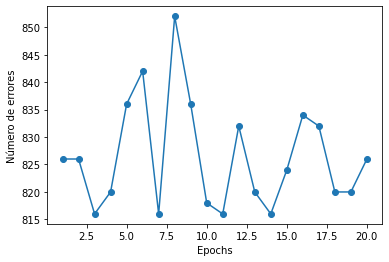

Porcentaje de error:
[27.05 27.05 26.72 26.85 27.37 27.57 26.72 27.9  27.37 26.78 26.72 27.24
 26.85 26.72 26.98 27.31 27.24 26.85 26.85 27.05]


In [13]:
ppn = Perceptron(eta=0.1, n_iter=20)
ppn.fit(X_train_std2, y_train)
plt.plot(range(1, len(ppn.errors_) + 1), 
         ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Número de errores')
plt.show()
print('Porcentaje de error:')
print(np.round(100*np.array(ppn.errors_).T/len(y_train),2))

Vemos que el porcentaje de error es superior al 25% independientemente del número de epochs. Visualicemos la frontera de decisión.

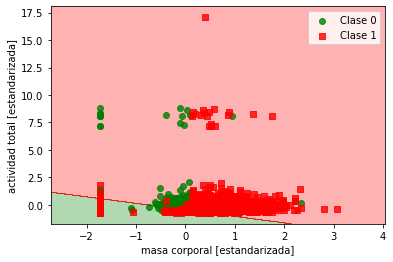

In [14]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02): 
    """ Function plot_decision_regions
        Entrada:
            X --> es la matriz de datos, (filas= ejemplos, columnas = features).
            y --> es el vector con las etiquetas de las clases.
            classifier --> es el nombre del clasificador (perceptron, Adaline, etc)
            resolution --> en np.arange(star,stop, step), resolution = step, distancia entre valores.
    """
    # setup marker generator and color map
    markers = ('o', 's', '^', 'V', '<')
    colors = ('green', 'red', 'blue', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #plot the decision surface
    # x1_min, x_1_max son los valores mínimos y máximos de la columna primera de X (índice 0)
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
    
    # x2_min, x_2_max son los valores mínimos y máximos de la columna segunda de X (índice 1)
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
    
    # se hace meshgrid entre los mínimos y máximos con resolución prefijada
    # Nota: si xx1, xx2 = np.mesgrid(v1,v2), v1 es un vector Mx1 y v2 es un vector Nx1 ==>
    # dimension matriz xx1 = N filas x M columnas y dimension matriz xx2 = N filas x M columnas
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # xx1.ravel pone en forma de vector los valores de la matriz xx1, lo mismo para xx2.ravel
    # dimension del vector xx1.ravel = NxM = dimension del vector xx2.ravel ==> la matriz
    # np.array([np.array([xx1.ravel(), xx2.ravel()]).T]) tiene NxM filas y dos columnas. Esto configura la matriz
    # X que se le pasa al método predict del clasificador. La matriz X tiene tantas filas como ejemplos y 
    # tantas columnas como features, en este caso hay dos.
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    # Se cambia la dimensión de la matriz lab para que sea la misma que xx1 ==> N filas x M columnas
    lab = lab.reshape(xx1.shape)
    
    # El método contourf se llama con contourf([X, Y,] lab, [levels], **kwargs)
    # Parámetros:
    # X, Yarray-like, optional; The coordinates of the values in Z.
    # X and Y must both be 2D with the same shape as Z (e.g. created via numpy.meshgrid),
    # or they must both be 1-D such that len(X) == N is the number of columns in Z 
    # and len(Y) == M is the number of rows in Z.
    # X and Y must both be ordered monotonically. If not given, they are assumed to be integer indices,
    # i.e. X = range(N), Y = range(M). 
    # lab(M, N) array-like, the height values over which the contour is drawn. 
    # Color-mapping is controlled by cmap, norm, vmin, and vmax.
    # levelsint or array-like, optional, Determines the number and positions of the contour lines / regions.

    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples.
    # plt.scatter ya no admite edgecolor='black' y ha sido sustituido por facecolor='black'
    # x son los valores de la primera columna de X cuando la etiqueta de clase en y es igual a cl.
    # En el problema de clasificación del Perpectron, solamente hay dos posibilidades +1 y -1
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y = X[y == cl, 1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=f'Clase {cl}',
                   facecolor='black')
          
# En el clasificador vamos a pasar ppn que corresponde al Perceptron                           
plot_decision_regions(X_train_std2, y_train, classifier = ppn)
plt.xlabel('masa corporal [estandarizada]')
plt.ylabel('actividad total [estandarizada]')
plt.legend(loc='best')
plt.show()   

Busquemos unas featrues con las que el perceptrón pueda trabajar mejor. Para ello ralizamos el mismo procedimiento que cuando se escogieron las características de masa corporal y actividad total, pero pidiendo al ordenador que muestre las mejores 3 características para clasificar. Haciendo esto, la tercera mejor característica es la temperatura ambiente, la cuarta en el dataset.

Probemos con la característica más importante y con la tercera, es decir, con la masa corporal y la tensión arterial (característica número 31).

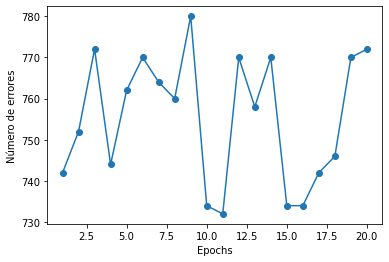

Porcentaje de error:
[24.3  24.62 25.28 24.36 24.95 25.21 25.02 24.89 25.54 24.03 23.97 25.21
 24.82 25.21 24.03 24.03 24.3  24.43 25.21 25.28]


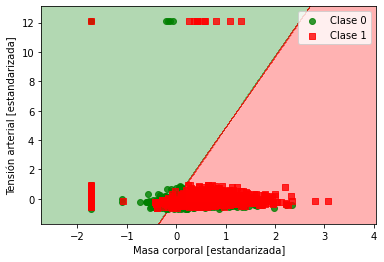

In [15]:
X_prueba=X_train_std[:,[k2[0],30]] # Escribimos 30 porque queremos la característica 31


# Con la X e y construidas en 1.2.8, llamamos al método de entrenamiento fit.
ppn.fit(X_prueba, y_train)

# Dibujamos los errores en cada epoch contando el número de updates positivos. 
# Recordad que un update positivo significa que la predicción erró la clase,
# mientras que un update cero significa que la predicción acertó la clase. 
plt.plot(range(1, len(ppn.errors_) + 1), 
         ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Número de errores')
plt.show()
print('Porcentaje de error:')
print(np.round(100*np.array(ppn.errors_).T/len(y_train),2))
plot_decision_regions(X_prueba, y_train, classifier = ppn)
plt.xlabel('Masa corporal [estandarizada]')
plt.ylabel('Tensión arterial [estandarizada]')
plt.legend(loc='best')
plt.show() 

De nuevo, el perceptrón no es capaz de clasificar los datos ya que siguen sin ser linealmente separables.

Hagamos otra comprobación: cambiemos el valor de $\eta$ a 0,01 y 0,5 y veamos el porcentaje de error (__volvemos a trabajar con la masa corporal y la actividad total__).

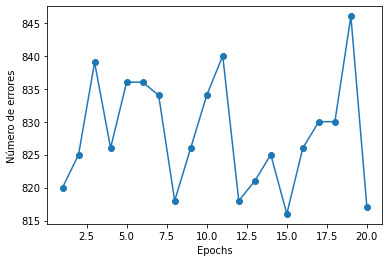

Porcentaje de error eta=0.01:
[26.85 27.01 27.47 27.05 27.37 27.37 27.31 26.78 27.05 27.31 27.5  26.78
 26.88 27.01 26.72 27.05 27.18 27.18 27.7  26.75]


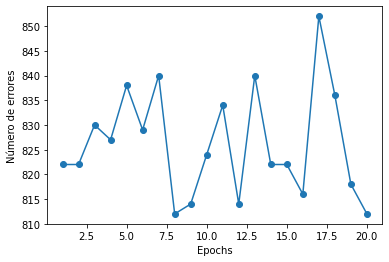

Porcentaje de error eta=0.5:
[26.92 26.92 27.18 27.08 27.44 27.14 27.5  26.59 26.65 26.98 27.31 26.65
 27.5  26.92 26.92 26.72 27.9  27.37 26.78 26.59]


In [16]:
# eta=0.01
ppn = Perceptron(eta=0.01, n_iter=20)
ppn.fit(X_train_std2, y_train)
plt.plot(range(1, len(ppn.errors_) + 1), 
         ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Número de errores')
plt.show()
print('Porcentaje de error eta=0.01:')
print(np.round(100*np.array(ppn.errors_).T/len(y_train),2))

# eta=0.5
ppn = Perceptron(eta=0.5, n_iter=20)
ppn.fit(X_train_std2, y_train)
plt.plot(range(1, len(ppn.errors_) + 1), 
         ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Número de errores')
plt.show()
print('Porcentaje de error eta=0.5:')
print(np.round(100*np.array(ppn.errors_).T/len(y_train),2))

El porcentaje de error se encuentra alrededor de los mismos valores que en los casos anteriores.

Hasta ahora hemos estado analizando el error que comete el perceptrón con cada epoch de entrenamiento. Veamos el __acierto sobre los casos con los que nos se entrenó__.

In [17]:
# eta=0.1
ppn = Perceptron(eta=0.1, n_iter=20)
ppn.fit(X_train_std2, y_train)
y_pred_01=ppn.predict(X_test_std2) # predicción de perceptrón

# eta=0.01
ppn = Perceptron(eta=0.01, n_iter=20)
ppn.fit(X_train_std2, y_train)
y_pred_001=ppn.predict(X_test_std2) # predicción de perceptrón

# eta=0.5
ppn = Perceptron(eta=0.5, n_iter=20)
ppn.fit(X_train_std2, y_train)
y_pred_05=ppn.predict(X_test_std2) # predicción de perceptrón

acierto01=0
acierto001=0
acierto05=0
for i in range(len(y_test)):
    if y_pred_01[i]==y_test[i]:
        acierto01+=1
    if y_pred_001[i]==y_test[i]:
        acierto001+=1
    if y_pred_05[i]==y_test[i]:
        acierto05+=1
acierto01=acierto01/len(y_test)
acierto001=acierto001/len(y_test)
acierto05=acierto05/len(y_test)
    

print('Porcentaje de acierto con eta=0.1= ',round(acierto01*100,2),'%')
print('Porcentaje de acierto con eta=0.01= ',round(acierto001*100,2),'%')
print('Porcentaje de acierto con eta=0.5= ',round(acierto05*100,2),'%')

Porcentaje de acierto con eta=0.1=  76.24 %
Porcentaje de acierto con eta=0.01=  76.78 %
Porcentaje de acierto con eta=0.5=  75.94 %


Vemos que la diferencia es mínima, siendo la mejor predicción aquella con $\eta=0.01$. Probemos a variar las proporciones de los grupos de entrenamiento y test. Lo haremos para porcentajes de test en un rango de 5% a 30% y $\eta=0.01$.

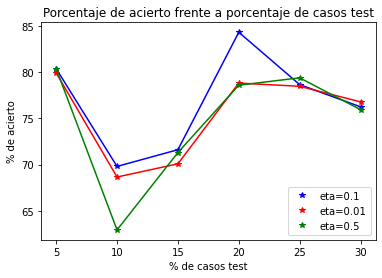

In [18]:
a01=[]
a001=[]
a05=[]
# listas donde guardar el porcentaje de acierto
pc=[5,10,15,20,25,30]

for i in range(6):

    # Creamos la nueva división de casos
    X_train2, X_test2, y_train2, y_test2 =\
        train_test_split(X, y, 
                         test_size=0.05*(i+1), # con esto barremos los porcentajes requeridos
                         random_state=0,
                         stratify=y)
    # Estandarizamos
    X_train2_std = stdc.fit_transform(X_train2)
    X_test2_std = stdc.fit_transform(X_test2)

    # Cogemos las 2 características que queremos
    X_train2_std2=X_train2_std[:, k2]
    X_test2_std2=X_test2_std[:, k2]

    # Realizamos lo mismo que antes

    # eta=0.1
    ppn = Perceptron(eta=0.1, n_iter=20)
    ppn.fit(X_train2_std2, y_train2)
    y_pred_01=ppn.predict(X_test2_std2) # predicción de perceptrón

    # eta=0.01
    ppn = Perceptron(eta=0.01, n_iter=20)
    ppn.fit(X_train2_std2, y_train2)
    y_pred_001=ppn.predict(X_test2_std2) # predicción de perceptrón

    # eta=0.5
    ppn = Perceptron(eta=0.5, n_iter=20)
    ppn.fit(X_train2_std2, y_train2)
    y_pred_05=ppn.predict(X_test2_std2) # predicción de perceptrón

    acierto01=0
    acierto001=0
    acierto05=0
    for j in range(len(y_test2)):
        if y_pred_01[j]==y_test2[j]:
            acierto01+=1
        if y_pred_001[j]==y_test2[j]:
            acierto001+=1
        if y_pred_05[j]==y_test2[j]:
            acierto05+=1
    a01.append(100*acierto01/len(y_test2))
    a001.append(100*acierto001/len(y_test2))
    a05.append(100*acierto05/len(y_test2))

    
    
plt.plot(pc,a01,'b*',label='eta=0.1')
plt.plot(pc,a01,'b-')
plt.plot(pc,a001,'r*',label='eta=0.01')
plt.plot(pc,a001,'r-')
plt.plot(pc,a05,'g*',label='eta=0.5')
plt.plot(pc,a05,'g-')
plt.xlabel('% de casos test')
plt.ylabel('% de acierto')
plt.legend(loc='best')
plt.title('Porcentaje de acierto frente a porcentaje de casos test')
plt.show()

Podemos ver que el máximo de acierto ocurre con $\eta=0.1$ y un porcentaje de casos test del 20%, llegando a una precisión del 84%. Veamos cómo es la frontera de decisión en este caso.

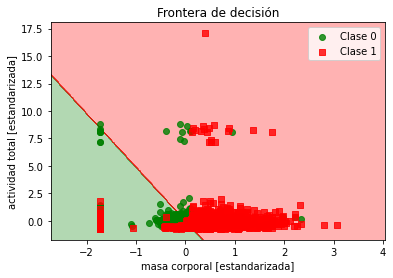

Porcentaje de acierto en los casos con reisgo:
90.94 %
Porcentaje de error en los casos con riesgo:
9.06 %
Porcentaje de acierto en los casos sin reisgo:
72.26 %
Porcentaje de error en los casos sin riesgo:
27.74 %


In [19]:
X_train3, X_test3, y_train3, y_test3 =\
        train_test_split(X, y, 
                         test_size=0.2, # con esto barremos los porcentajes requeridos
                         random_state=0,
                         stratify=y)
# Estandarizamos
X_train3_std = stdc.fit_transform(X_train3)
X_test3_std = stdc.fit_transform(X_test3)
# Cogemos las 2 características que queremos
X_train3_std2=X_train3_std[:, k2]
X_test3_std2=X_test3_std[:, k2]

ppn = Perceptron(eta=0.1, n_iter=20)
ppn.fit(X_train3_std2, y_train3)


plot_decision_regions(X_train_std2, y_train, classifier = ppn)
plt.xlabel('masa corporal [estandarizada]')
plt.ylabel('actividad total [estandarizada]')
plt.legend(loc='best')
plt.title('Frontera de decisión')
plt.show() 

y_pred=ppn.predict(X_test3_std2)
r=0 # número de casos con riesgo, clase 1
nr=0 # número de casos sin riesgo, clase 0
rsi=0 # número de casos con riesgo bien predichos
rno=0 # número de casos con reisgo mal predichos
nrsi=0 # número de casos sin riesgo bien predichos
nrno=0 # número de casos sin reisgo mal predichos

for i in range(len(y_test3)):
    if y_test3[i]==1:
        r+=1
        if y_pred[i]==1:
            rsi+=1
        else:
            rno+=1
    else:
        nr+=1
        if y_pred[i]==0:
            nrsi+=1
        else:
            nrno+=1
print('Porcentaje de acierto en los casos con reisgo:')
print(round(100*rsi/r,2),'%')
print('Porcentaje de error en los casos con riesgo:')
print(round(100*rno/r,2),'%')
print('Porcentaje de acierto en los casos sin reisgo:')
print(round(100*nrsi/nr,2),'%')
print('Porcentaje de error en los casos sin riesgo:')
print(round(100*nrno/nr,2),'%')

Si comparamos esta figura con la frontera de decisión con el 30% de casos tipo test, vemos que la nueva clasifica más la esquina inferior izquierda de la gráfica como casos sin riesgo que la anterior. Además, vemos que el porcentaje de casos con riesgo bien predichos es 90.94%.

Con esto terminamos el análisis del perceptrón, en el que hemos visto que es capaz de clasificar con un __85% de acierto__ los casos del grupo test.

### 2.2 Adeline

Vamos a realizar el mismo estudio que en el perceptrón, pero con el algoritmo Adaline. Para ello, creamos a continuación una clase con este algoritmo.

In [20]:
class AdalineGD: 
    """ADAptive Linear Neuron classifier.
    
    Parametros:
    -----------
    eta : float
        Tasa de aprendizaje (Learning rate) (entre 0.0 y 1.0)
    n_iter : int
        Número de veces que se recorre el conjunto de entrenamiento (Passes over the training dataset)
    random_state : int
        Semilla del generador de números aleatorios para inicializar los pesos 
        (Random number generator seed for random weight initialization)
        
    Attributes :
    ----------
    w_ : 1d-array
        Pesos tras el ajuste del algoritmo (weights after fitting)
    b_ : Scalar
    losses_ : list
            (Mean squared error loss function values in each epoch)
        
      Procedimientos (Functions)
    ---------------------------
    
    __init__ : function
        Hace las veces de contructor en C++.
        Siempre lleva el parámetro self y además se ponen los valores de los
        parámetros eta, n_iter y random_state que se toman por defecto.
    
    fit : function
        Se encarga de hacer el ajuste de los datos de entrenamiento.
        Sus parámetros son: self, la matriz de datos X y el vector de clases y.
        La matriz X tiene por filas los distintos ejemplos de la base de datos
        (consideremos por ejemplo, 150 ejemplos de flores, por tanto X tendrá 150 filas),
        X tiene por columnas las características "features" de cada ejemplo
        (consideremos por ejemplo, sépalos y pétalos, por tanto X tendrá 2 columnas).
        El vector y contiene la etiqueta verdadera a la que pertenecen los ejemplos, 
        por eso son los valores "target". 
        
     net_input : function
        Se encarga de calcular el net input correspondiente a cada ejemplo del conjunto de datos.
        Concretamente usa el producto escalar del vector de pesos w con el vector de features x 
        $z = w_0 x_0 + w_1 x_1 + w_2 x_2 + \dots + w_m x_m = \textbf{w}^T \textbf{x}$
        Dado que x_0=1 y que w_0 contiene al -bias, el producto escalar se hace cada fila de X con 
        todos los pesos desde w_1 hasta w_m y luego se añade w_0 = w_0*x_0 = w_0*1
        
     predict : function
         Para cada una de las filas de la matriz X se calcula su correspodiente net input, y se 
         le aplica la función de activación que es la identidad, de forma que si el valor sale
         positivo o nulo, entonces se predice un +1, en caso contrario se predice -1.

        
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1) :
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y) :
        """ Ajuste de los datos de entrenamiento (Fit training data)
        
        Parameters 
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples is the number of examples
            and n_features is the number of features.
        y : array-like, shape = [n_examples]
            Target values.
            
        Returns 
        -------
        self : object
        
        """
        # Llamada al generador de números pseudo-aleatorios Mersenne Twister con semilla random_state.
        # El valor de la semilla se usa para poder repetir los resultados del algoritmo para comparación. 
        rgen = np.random.RandomState(self.random_state)
        
        # Distribuimos en el vector de pesos w_ valores que siguen una distribución normal
        # de media (mean) loc=0.0 y desviación típica (standard deviation) scale=0.01
        # size indica el tamaño del vector w_, en este caso coincide con el número de 
        # columnas de X (dado por X.shape[1]) más 1, ya que hay tantos pesos como features
        # y además hay que añadir w_0 que proviene de tener en cuenta el bias 
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                             size = X.shape[1])
        self.b_ = self.b_ = np.float_(0.)
        
        # lista vacía que contendrá los valores de la función de coste para cada iteración
        # sobre el conjunto de ejemplos (de entrenamiento)
        self.losses_ = []
        
        # [1] el índice del for recorre el número de iteraciones (epoch)
        # [2] genera el net_input para cada ejemplo (fila de X). Por ejemplo, en el caso de 
        # la base de datos Iris, X es una matriz 100x2, donde hay 100 ejemplos de flores 
        # y 2 features (sepal length y petal length), por tanto cada fila i-ésima de X
        # genera el net_input w_0 + w_1 x_1^{(i)} + w_2 x_2^{(i)} = w^T x^{(i)} + w_0, 
        # con i = 1, 2, ...,100
        # [3] output recoge el valor devuelto por la función de activación, en Adaline es la identidad,
        # esto es, \phi(\alpha) = \alpha, para todo \alpha \in R.
        # [4] los errores son la diferencia entre el valor numérico de la etiqueta y y el valor del output
        # [5] Actualiza el valor de los pesos para los índices de w_j, con j distinto de cero,
        # esto se rige por w_j = w_j + eta*\sum_{i=1}^{100} (errors)*x_j^{(i)}
        # [6] Actualiza el valor de w_0, mediante w_0 = w_0 + eta*\sum_{i=1}^{(100)} (errors)
        # [7] la variable cost va recogiendo la 1/2 de la suma de los cuadrados de los errores a medida que i 
        # recorre el for
        # [8] Los valores de cost se van añadiendo a la lista cost_ .
        for i in range(self.n_iter) :
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta *2.0* X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0*errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self
    
    def net_input(self, X) :
        """ Calculate net input """
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, X) :
        """Compute linear activation """ 
        return X
    
    def predict(self, X) :
        """ Return class label after unit step """
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

Probemos de nuevo con las características de masa corporal y actividad total, haciendo un barrido de valores de $\eta$ de 0.1 a 1.

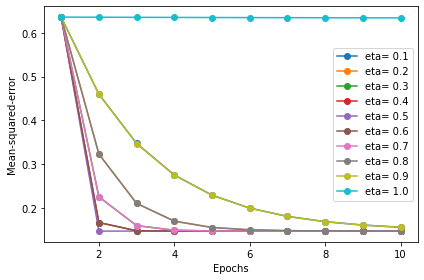

In [21]:

for i in range(10):
    ada_gd = AdalineGD(n_iter=10, eta = 0.1*(i+1))
    ada_gd.fit(X_train_std2,y_train)
    plt.plot(range(1, len(ada_gd.losses_) + 1 ),
            ada_gd.losses_, marker='o'.format(i+1), label=f'eta= {0.1*(i+1):.1f}')
plt.xlabel('Epochs')
plt.ylabel('Mean-squared-error')
plt.tight_layout()
plt.legend(loc='best')
plt.show()

Vemos que al disminuir el valor de $\eta$, más rápido converge el algoritmo, pareciendo que llega a un límite de 2 epochs a partir de 0.5. Variemos la proporción de casos test para distintos valores de $\eta$.

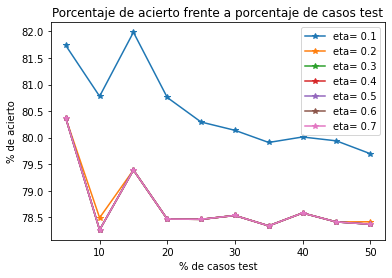

In [22]:
# listas donde guardar el porcentaje de acierto
# pc=[5,10,15,20,25,30]
pc=[5,10,15,20,25,30,35,40,45,50]
eta_prueba=[0.1,0.2,0.3,0.4,0.5,0.6,0.7]
for k in range(len(eta_prueba)):
    a=[]
    for i in range(len(pc)):
        # Creamos la nueva división de casos
        X_train2, X_test2, y_train2, y_test2 =\
            train_test_split(X, y, 
                             test_size=0.05*(i+1), # con esto barremos los porcentajes requeridos
                             random_state=0,
                             stratify=y)

        # Estandarizamos
        X_train2_std = stdc.fit_transform(X_train2)
        X_test2_std = stdc.fit_transform(X_test2)

        # Cogemos las 2 características que queremos
        X_train2_std2=X_train2_std[:, k2]
        X_test2_std2=X_test2_std[:, k2]
        ada_gd = AdalineGD(n_iter=10, eta = eta_prueba[k])
        ada_gd.fit(X_train2_std2,y_train2)
        y_pred=ada_gd.predict(X_test2_std2) # predicción de adaline

        acierto=0
        for j in range(len(y_test2)):
            if y_pred[j]==y_test2[j]:
                acierto+=1
        a.append(100*acierto/len(y_test2))
    plt.plot(pc,a,'*-',label=f'eta= {eta_prueba[k]:.1f}')
plt.xlabel('% de casos test')
plt.ylabel('% de acierto')
plt.legend(loc='best')
plt.title('Porcentaje de acierto frente a porcentaje de casos test')
plt.show()


Vemos que el mayor porcentaje de acieto se alcanza con $\eta=0.1$ un porcentaje de casos test del 15%. Dibujemos la frontera de decisión de este caso y calculemos el acierto de las predicciones del grupo test.

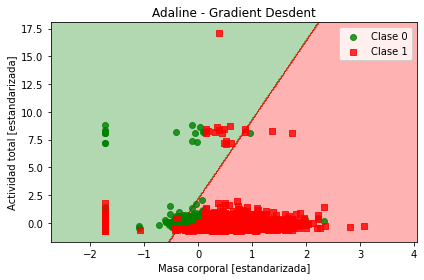

Porcentaje de acierto en los casos con reisgo:
94.33 %
Porcentaje de error en los casos con riesgo:
5.67 %
Porcentaje de acierto en los casos sin reisgo:
59.05 %
Porcentaje de error en los casos sin riesgo:
40.95 %
Porcentaje de acierto total:
81.83
Porcentajde de error total:
18.17


In [23]:
X_train3, X_test3, y_train3, y_test3 =\
        train_test_split(X, y, 
                         test_size=0.15, # con esto barremos los porcentajes requeridos
                         random_state=0,
                         stratify=y)
# Estandarizamos
X_train3_std = stdc.fit_transform(X_train3)
X_test3_std = stdc.fit_transform(X_test3)
# Cogemos las 2 características que queremos
X_train3_std2=X_train3_std[:, k2]
X_test3_std2=X_test3_std[:, k2]

ada_gd = AdalineGD(n_iter=10, eta = 0.1)
ada_gd.fit(X_train_std2,y_train)

plot_decision_regions(X_train_std2,y_train, classifier=ada_gd)
plt.title('Adaline - Gradient Desdent')
plt.xlabel('Masa corporal [estandarizada]')
plt.ylabel('Actividad total [estandarizada]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

y_pred=ada_gd.predict(X_test3_std2)
r=0 # número de casos con riesgo, clase 1
nr=0 # número de casos sin riesgo, clase 0
rsi=0 # número de casos con riesgo bien predichos
rno=0 # número de casos con reisgo mal predichos
nrsi=0 # número de casos sin riesgo bien predichos
nrno=0 # número de casos sin reisgo mal predichos
a=0# número de aciertos
an=0 # numéro de errores

for i in range(len(y_test3)):
    if y_test3[i]==1:
        r+=1
        if y_pred[i]==1:
            rsi+=1
            a+=1 # si coinciden es un acierto
        else:
            rno+=1
            an+=1
    else:
        nr+=1
        if y_pred[i]==0:
            nrsi+=1
            a+=1 # si coinciden es un acierto
        else:
            nrno+=1
            an+=1
print('Porcentaje de acierto en los casos con reisgo:')
print(round(100*rsi/r,2),'%')
print('Porcentaje de error en los casos con riesgo:')
print(round(100*rno/r,2),'%')
print('Porcentaje de acierto en los casos sin reisgo:')
print(round(100*nrsi/nr,2),'%')
print('Porcentaje de error en los casos sin riesgo:')
print(round(100*nrno/nr,2),'%')
print('Porcentaje de acierto total:')
print(round(100*a/len(y_test3),2))
print('Porcentajde de error total:')
print(round(100*an/len(y_test3),2))


En este caso tenemos que el porcentaje de acierto total es menor que en el del perceptrón, pero entro los casos que tienen riesgo de padecer hipertensión es más efectivo.

### 2.3 Logistic Regression

Vamos a realizar el mismo estudio que en el Perceptron, pero con el algoritmo Logistic Regression. Para ello, creamos a continuación una clase para este algoritmo, modificando la función de pérdida y la función de activación por la sigmoid.

In [24]:
class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.
    
    Parameters
    -----------
    eta : float
        Learning rate (between 0.0 and 1.0)   
    n_iter : int
        Passes over the training dataset.
    random_state : int 
        Random number generator seed for random weight initialization.
        
        
    Attributes
    -----------
    w_ :1d-array
        Weights for training.
    b_ : Scalar
        Bias after fitting.
    losses_ : list
        Log Loss function values in each epoch.
        
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data
        
        Parameters
        -----------
        X : (array-like), shape = [n_examples, n_features]
            Training vectors, where n_examples is the number of examples
            and n_features is the number of features.
        y : array-like, shape = [n_examples]
            Target values.
            
        Returns
        --------
        self : Instance of LogisticRegressionGD
        
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = float(0.)
        self.losses_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (-y.dot(np.log(output))
                   - ((1-y).dot(np.log(1 - output)))
                   / X.shape[0])
            self.losses_.append(loss)
        return self
        
        
    def net_input(self, X):
        """ Calculate net input """
        return np.dot(X, self.w_) + self.b_
        
    def activation(self, z):
        """ Compute logistic sigmoid activation """
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
        
    def predict(self, X):
        """ Return class label after unit step """
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

Probemos de nuevo con las características de masa corporal y actividad total, haciendo un barrido de valores de $\eta$ de 0.1 a 1.

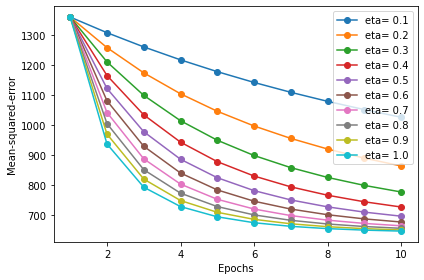

In [25]:
for i in range(10):
    lr_gd = LogisticRegressionGD(eta = 0.1*(i+1), n_iter=10, random_state=1)
    lr_gd.fit(X_train_std2,y_train)
    plt.plot(range(1, len(lr_gd.losses_) + 1 ),
            lr_gd.losses_, marker='o'.format(i+1), label=f'eta= {0.1*(i+1):.1f}')
plt.xlabel('Epochs')
plt.ylabel('Mean-squared-error')
plt.tight_layout()
plt.legend(loc='best')
plt.show()

Al igual que para Adaline vemos que, al disminuir el valor de $\eta$, más rápido converge el algoritmo. No obstante, el error cuadrático medio sigue siendo muy alto.

Variemos la proporción de casos test para distintos valores de $\eta$.

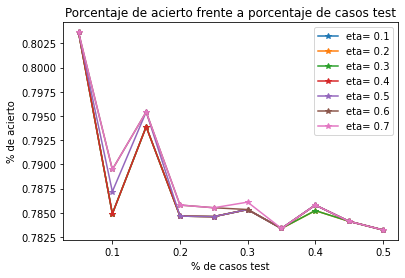

In [26]:
# listas donde guardar el porcentaje de acierto
# pc=[5,10,15,20,25,30]
pc=[0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
eta_prueba=[0.1,0.2,0.3,0.4,0.5,0.6,0.7]
for k in range(len(eta_prueba)):
    a=[]
    for i in range(len(pc)):
        # Creamos la nueva división de casos
        X_train4, X_test4, y_train4, y_test4 =\
            train_test_split(X, y, 
                             test_size=0.05*(i+1), # con esto barremos los porcentajes requeridos
                             random_state=0,
                             stratify=y)

        # Estandarizamos
        X_train4_std = stdc.fit_transform(X_train4)
        X_test4_std = stdc.fit_transform(X_test4)

        # Cogemos las 2 características que queremos
        X_train4_std2=X_train4_std[:, k2]
        X_test4_std2=X_test4_std[:, k2]
        lr_gd = LogisticRegressionGD(n_iter=10, eta = eta_prueba[k])
        lr_gd.fit(X_train4_std2,y_train4)
        y_pred=lr_gd.predict(X_test4_std2) # predicción de LogisticRegression

        acierto=0
        for j in range(len(y_test4)):
            if y_pred[j]==y_test4[j]:
                acierto+=1
        a.append(acierto/len(y_test4))
    plt.plot(pc,a,'*-',label=f'eta= {eta_prueba[k]:.1f}')
plt.xlabel('% de casos test')
plt.ylabel('% de acierto')
plt.legend(loc='best')
plt.title('Porcentaje de acierto frente a porcentaje de casos test')
plt.show()

Vemos que el mayor porcentaje de acieto se alcanza con $\eta=0.7$ y un porcentaje de casos test del 5%. Dibujemos la frontera de decisión de este caso y calculemos el acierto de las predicciones del grupo test.

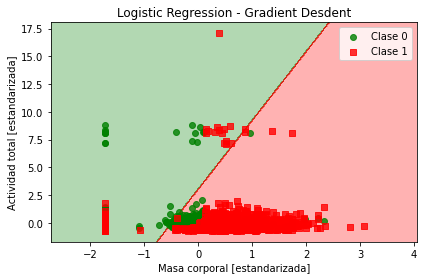

Porcentaje de acierto en los casos con riesgo:
92.91 %
Porcentaje de error en los casos con riesgo:
7.09 %
Porcentaje de acierto en los casos sin riesgo:
57.69 %
Porcentaje de error en los casos sin riesgo:
42.31 %
Porcentaje de acierto total:
80.37
Porcentaje de error total:
19.63


In [27]:
X_train5, X_test5, y_train5, y_test5 =\
        train_test_split(X, y, 
                         test_size=0.05, # con esto barremos los porcentajes requeridos
                         random_state=0,
                         stratify=y)
# Estandarizamos
X_train5_std = stdc.fit_transform(X_train5)
X_test5_std = stdc.fit_transform(X_test5)
# Cogemos las 2 características que queremos
X_train5_std2=X_train5_std[:, k2]
X_test5_std2=X_test5_std[:, k2]

lr_gd = LogisticRegressionGD(n_iter=10, eta = 0.7)
lr_gd.fit(X_train5_std2,y_train5)

plot_decision_regions(X_train_std2,y_train, classifier=lr_gd)
plt.title('Logistic Regression - Gradient Desdent')
plt.xlabel('Masa corporal [estandarizada]')
plt.ylabel('Actividad total [estandarizada]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

y_pred=lr_gd.predict(X_test5_std2)
r=0 # número de casos con riesgo, clase 1
nr=0 # número de casos sin riesgo, clase 0
rsi=0 # número de casos con riesgo bien predichos
rno=0 # número de casos con reisgo mal predichos
nrsi=0 # número de casos sin riesgo bien predichos
nrno=0 # número de casos sin reisgo mal predichos
a=0# número de aciertos
an=0 # numéro de errores

for i in range(len(y_test5)):
    if y_test5[i]==1:
        r+=1
        if y_pred[i]==1:
            rsi+=1
            a+=1 # si coinciden es un acierto
        else:
            rno+=1
            an+=1
    else:
        nr+=1
        if y_pred[i]==0:
            nrsi+=1
            a+=1 # si coinciden es un acierto
        else:
            nrno+=1
            an+=1
print('Porcentaje de acierto en los casos con riesgo:')
print(round(100*rsi/r,2),'%')
print('Porcentaje de error en los casos con riesgo:')
print(round(100*rno/r,2),'%')
print('Porcentaje de acierto en los casos sin riesgo:')
print(round(100*nrsi/nr,2),'%')
print('Porcentaje de error en los casos sin riesgo:')
print(round(100*nrno/nr,2),'%')
print('Porcentaje de acierto total:')
print(round(100*a/len(y_test5),2))
print('Porcentaje de error total:')
print(round(100*an/len(y_test5),2))


En este caso tenemos que el porcentaje de acierto total es menor que el de Perceptron y el de Adaline, pero entre los casos que tienen riesgo de padecer hipertensión es más efectivo que el de Perceptron.

### 3. Algoritmos de clasificación con la librería Scikit-Learn

En la librería Scikit-Learn de python encontramos diversos clasificadores, entre ellos el perceptrón y logistic regression, que ya hemos analizado. Lo primero que haremos en esta sección será comparar los resultados de nuestros algoritmos con los de la librería y luego analizaremos 3 nuevos de la librería: Support Vector Machine, Decission Trees y K-Nearest NEighbours.

### 3.1 Comparación con los resultados ya obtenidos
#### 3.1.1 Perceptrón

Comencemos con el perceptrón. Compararemos directamente el caso con $\eta=0.1$ y un 20% de casos test.

In [28]:
# Separamos los datos
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.2,
                     random_state=0,
                     stratify=y)
X_train_std = stdc.fit_transform(X_train)
X_test_std = stdc.fit_transform(X_test)
X_train_std2=X_train_std[:,k2]
X_test_std2=X_test_std[:,k2]

# Importamos el perceptrón de la librería
from sklearn.linear_model import Perceptron

# Entrenamos el perceptrón
ppn = Perceptron(eta0=0.1, random_state=0)
ppn.fit(X_train_std2, y_train)

# Hacemos la predicción
y_pred =  ppn.predict(X_test_std2)
print('El porcentaje de acierto es: ', round(100*accuracy_score(y_test, y_pred),2))

El porcentaje de acierto es:  78.12


Es menor que el que conseguimos con nuestro algoritmo. Esto se puede deber al número de epochos usado, ya que, como vimos anteriormente, el número de errores varía con el número de epochs. Veamos la frontera de decisión. Para ello hace falta una nueva función de representación.

In [29]:
def plot_decision_regions2(X, y, classifier, test_idx=None, resolution= 0.02): # nueva función de representación
    # setup marker and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('green', 'red', 'blue', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],
                    y=X[y==cl, 1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=f'Class {cl}',
                   edgecolor='black')
        
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
            
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='Test set')

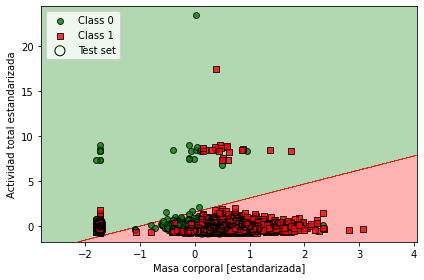

In [30]:
X_combined_std = np.vstack((X_train_std2, X_test_std2))
y_combined =  np.hstack((y_train, y_test))
plot_decision_regions2(X=X_combined_std,
                     y=y_combined,
                     classifier=ppn,
                     test_idx=range(105, 150))
plt.xlabel('Masa corporal [estandarizada]')
plt.ylabel('Actividad total estandarizada')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Esta frontera de decisión es más parecida a la del algoritmo Adaline que a las del perceptrón, dado que son las únicas con pendiente ascendentes. De nuevo, como los datos no son linelamente separables no esperábamos que el algoritmo fuese capaz de clasificar perfectamente los casos.

#### 3.1.2 Logistic Regression

Vayamos con el Logistic Regression. Compararemos directamente el caso con $\eta=0.7$ y un 5% de casos test, que, según lo visto anteriormente, son los parámetros para los cuales la precisión de este algoritmo es mayor.

In [31]:
# Separamos los datos
X_train_lr, X_test_lr, y_train_lr, y_test_lr =\
    train_test_split(X, y, 
                     test_size=0.05,
                     random_state=0,
                     stratify=y)
X_train_lr_std = stdc.fit_transform(X_train_lr)
X_test_lr_std = stdc.fit_transform(X_test_lr)
X_train_lr_std2=X_train_lr_std[:,k2]
X_test_lr_std2=X_test_lr_std[:,k2]

# Importamos el Logistic Regression de la librería
from sklearn.linear_model import LogisticRegression

# Entrenamos el perceptrón
lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_lr_std2, y_train_lr)

# Hacemos la predicción
y_pred_lr =  lr.predict(X_test_lr_std2)
print('El porcentaje de acierto es: ', round(100*accuracy_score(y_test_lr, y_pred_lr),2))

El porcentaje de acierto es:  80.37


Vemos que la precisión es exactamente la misma que para la clase creada manualmente.

### 3.2. Otros algoritmos de clasificación

#### 3.2.1. Support Vector Machine (SVM)

Procediendo de la misma forma para el algortimo SVM:

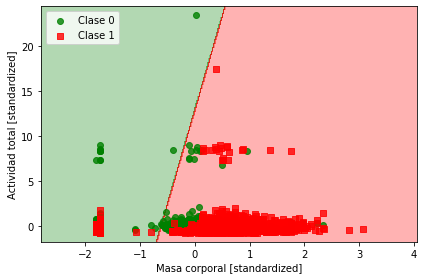

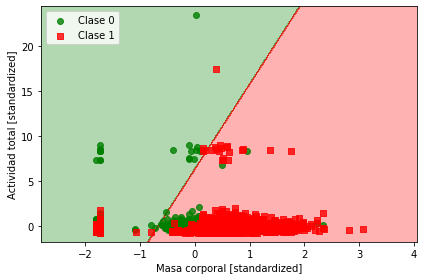

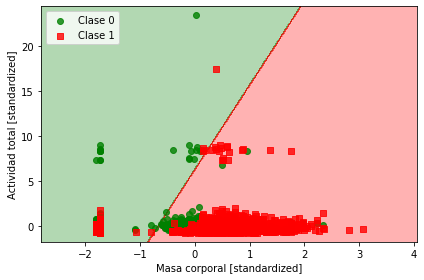

El porcentaje de acierto con C = 0.001 es:  78.01
El porcentaje de acierto con C = 1.0 es:  78.12
El porcentaje de acierto con C = 1000.0 es:  78.12


In [32]:
# Separamos los datos
X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM =\
    train_test_split(X, y, 
                     test_size=0.2,
                     random_state=0,
                     stratify=y)
X_train_SVM_std = stdc.fit_transform(X_train_SVM)
X_test_SVM_std = stdc.fit_transform(X_test_SVM)
X_train_SVM_std2=X_train_SVM_std[:,k2]
X_test_SVM_std2=X_test_SVM_std[:,k2]

# Importamos el SVM de la librería
from sklearn.svm import SVC

# Entrenamos el SVM
SVM1 = SVC(kernel='linear', C=0.001, random_state=1)
SVM1.fit(X_train_std2, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=SVM1)
plt.xlabel('Masa corporal [standardized]')
plt.ylabel('Actividad total [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

SVM2 = SVC(kernel='linear', C=1.0, random_state=1)
SVM2.fit(X_train_std2, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=SVM2)
plt.xlabel('Masa corporal [standardized]')
plt.ylabel('Actividad total [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

SVM3 = SVC(kernel='linear', C=1000.0, random_state=1)
SVM3.fit(X_train_std2, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=SVM3)
plt.xlabel('Masa corporal [standardized]')
plt.ylabel('Actividad total [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


# Hacemos la predicción
y_pred_SVM1 =  SVM1.predict(X_test_SVM_std2)
print('El porcentaje de acierto con C = 0.001 es: ', round(100*accuracy_score(y_test_SVM, y_pred_SVM1),2))
y_pred_SVM2 =  SVM2.predict(X_test_SVM_std2)
print('El porcentaje de acierto con C = 1.0 es: ', round(100*accuracy_score(y_test_SVM, y_pred_SVM2),2))
y_pred_SVM3 =  SVM3.predict(X_test_SVM_std2)
print('El porcentaje de acierto con C = 1000.0 es: ', round(100*accuracy_score(y_test_SVM, y_pred_SVM3),2))

Vemos que parece que el acierto es igual que el del Perceptron de esta librería para valores del parámetro C del orden unidad o mayor, pero ligeramente menor para valores menores. Nuevamente, la pendiente es ascendente para este algoritmo de clasificación, como lo fue para Adaline y Logistic Regression y no para Perceptron.

Por completitud, puede hacerse una prueba con el algoritmo SVM en su versión no lineal. En este caso, para los mismos 3 valores del parámetro C.

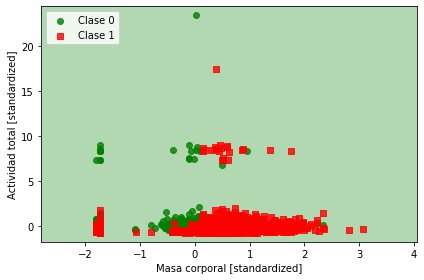

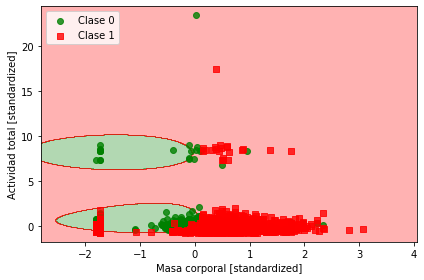

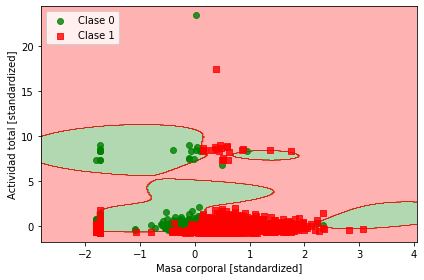

El porcentaje de acierto con C = 0.001 es:  64.49
El porcentaje de acierto con C = 1.0 es:  90.49
El porcentaje de acierto con C = 1000.0 es:  85.11


In [33]:
# Separamos los datos
X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM =\
    train_test_split(X, y, 
                     test_size=0.2,
                     random_state=0,
                     stratify=y)
X_train_SVM_std = stdc.fit_transform(X_train_SVM)
X_test_SVM_std = stdc.fit_transform(X_test_SVM)
X_train_SVM_std2=X_train_SVM_std[:,k2]
X_test_SVM_std2=X_test_SVM_std[:,k2]

# Importamos el perceptrón de la librería
from sklearn.svm import SVC

# Entrenamos el SVM
SVM1 = SVC(kernel='rbf', random_state=1, gamma=0.25, C=0.001)
SVM1.fit(X_train_std2, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=SVM1)
plt.xlabel('Masa corporal [standardized]')
plt.ylabel('Actividad total [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

SVM2 = SVC(kernel='rbf', random_state=1, gamma=0.25, C=1.0)
SVM2.fit(X_train_std2, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=SVM2)
plt.xlabel('Masa corporal [standardized]')
plt.ylabel('Actividad total [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

SVM3 = SVC(kernel='rbf', random_state=1, gamma=0.25, C=1000.0)
SVM3.fit(X_train_std2, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=SVM3)
plt.xlabel('Masa corporal [standardized]')
plt.ylabel('Actividad total [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


# Hacemos la predicción
y_pred_SVM1 =  SVM1.predict(X_test_SVM_std2)
print('El porcentaje de acierto con C = 0.001 es: ', round(100*accuracy_score(y_test_SVM, y_pred_SVM1),2))
y_pred_SVM2 =  SVM2.predict(X_test_SVM_std2)
print('El porcentaje de acierto con C = 1.0 es: ', round(100*accuracy_score(y_test_SVM, y_pred_SVM2),2))
y_pred_SVM3 =  SVM3.predict(X_test_SVM_std2)
print('El porcentaje de acierto con C = 1000.0 es: ', round(100*accuracy_score(y_test_SVM, y_pred_SVM3),2))

Para valores del orden de la unidad la aproximación es algo mejor. Parece que, si aumentamos, empieza a haber algo de overfitting. No obstante, habría que hacer un estudio detallado en base a todos los parámetros, pues no solo entra en juego C. Podría hacerse estudiando el error, al igual que se hizo para otros algoritmos, pero este clasificador de la librería no tiene ningún atributo que informe acerca de estos errores (losses).

#### 3.2.2. Decision Trees

Misma forma de proceder para Decision Trees, con una profundidad máxima de 4:

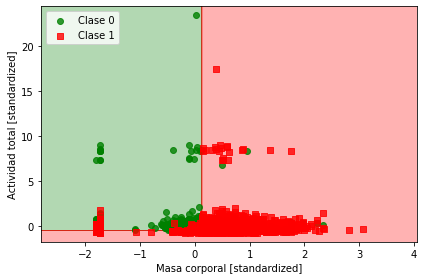

El porcentaje de acierto es:  92.55


In [34]:
# Separamos los datos
X_train_DT, X_test_DT, y_train_DT, y_test_DT =\
    train_test_split(X, y, 
                     test_size=0.2,
                     random_state=0,
                     stratify=y)
X_train_DT_std = stdc.fit_transform(X_train_DT)
X_test_DT_std = stdc.fit_transform(X_test_DT)
X_train_DT_std2=X_train_DT_std[:,k2]
X_test_DT_std2=X_test_DT_std[:,k2]

# Importamos el DecisionTrees de la librería
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini',
                                    max_depth=4,
                                    random_state=1)

tree_model.fit(X_train_DT_std2, y_train_DT)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=tree_model)
plt.xlabel('Masa corporal [standardized]')
plt.ylabel('Actividad total [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Hacemos la predicción
y_pred_DT =  tree_model.predict(X_test_DT_std2)
print('El porcentaje de acierto es: ', round(100*accuracy_score(y_test_DT, y_pred_DT),2))



Hasta ahora, el algoritmo más preciso de todos. Probemos con más profundidades máximas (1,2,3, 4, 5 y 10).

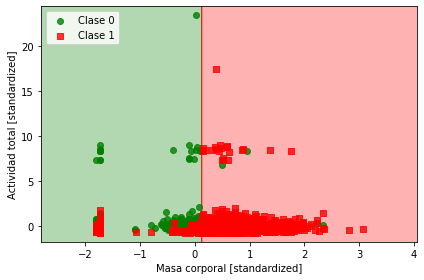

La profundidad máxima es:  1
El porcentaje de acierto es:  89.81


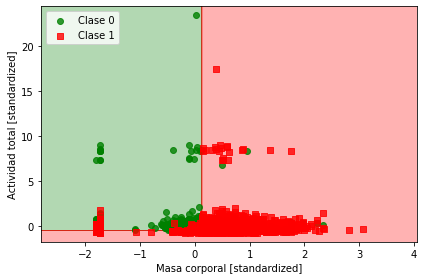

La profundidad máxima es:  2
El porcentaje de acierto es:  92.55


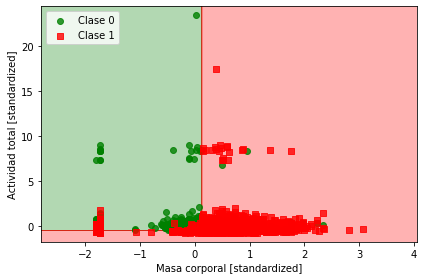

La profundidad máxima es:  3
El porcentaje de acierto es:  92.55


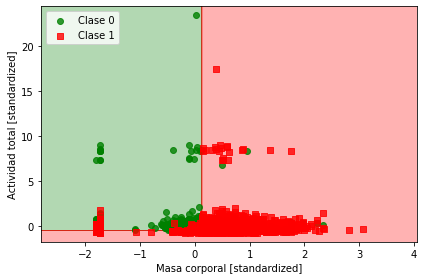

La profundidad máxima es:  4
El porcentaje de acierto es:  92.55


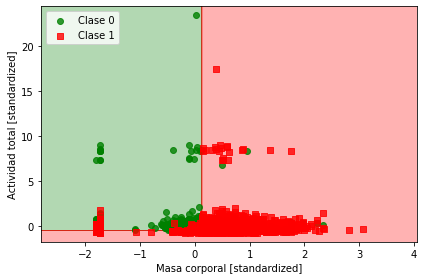

La profundidad máxima es:  5
El porcentaje de acierto es:  92.55


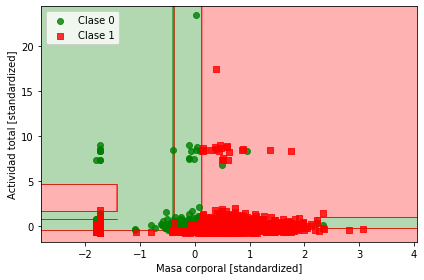

La profundidad máxima es:  10
El porcentaje de acierto es:  91.52


In [35]:
# Probaremos con profundidades 3, 4, 5 y 6
# Separamos los datos
X_train_DT, X_test_DT, y_train_DT, y_test_DT =\
    train_test_split(X, y, 
                     test_size=0.2,
                     random_state=0,
                     stratify=y)
X_train_DT_std = stdc.fit_transform(X_train_DT)
X_test_DT_std = stdc.fit_transform(X_test_DT)
X_train_DT_std2=X_train_DT_std[:,k2]
X_test_DT_std2=X_test_DT_std[:,k2]

prof=[1,2,3,4,5,10] # profundidades del árbol de decisión

for i in range(len(prof)):
    tree_model = DecisionTreeClassifier(criterion='gini',
                                        max_depth=prof[i],
                                        random_state=1)

    tree_model.fit(X_train_DT_std2, y_train_DT)
    plot_decision_regions(X_combined_std,
                          y_combined,
                          classifier=tree_model)
    plt.xlabel('Masa corporal [standardized]')
    plt.ylabel('Actividad total [standardized]')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

    # Hacemos la predicción
    y_pred_DT =  tree_model.predict(X_test_DT_std2)
    print('La profundidad máxima es: ',prof[i])
    print('El porcentaje de acierto es: ', round(100*accuracy_score(y_test_DT, y_pred_DT),2))

Vemos que el árbol de profundidad 1 divide espacio con una recta y tiene una precisión de aproximadamente 90%. Los árboles con profundidades 2, 3, 4 y 5 son aparentemente idénticos, con 2 rectas separando el espacio y una precisión aproximada de 92,5%. Por otro lado, al aumentar la profundidad hasta 10, el espacio queda dividido de una forma más compleja pero la precisión disminuye un 1%.

#### 3.2.3. K-nearest Neighbours

Probando para 2, 3, 5 y 10 vecinos más cercanos se tiene lo siguiente:

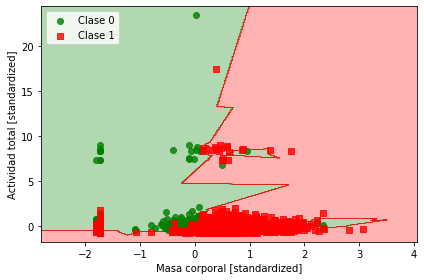

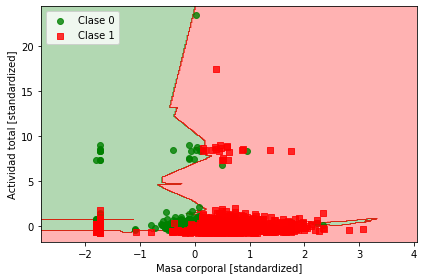

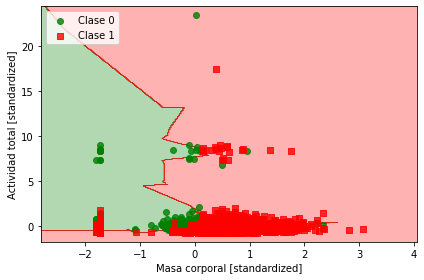

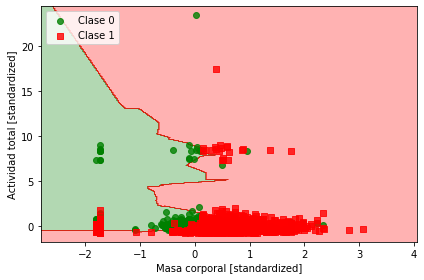

El porcentaje de acierto con 2 vecinos cercanos es:  84.31
El porcentaje de acierto con 3 vecinos cercanos es:  91.29
El porcentaje de acierto con 5 vecinos cercanos es:  91.98
El porcentaje de acierto con 10 vecinos cercanos es:  91.75


In [36]:
# Separamos los datos
X_train_knn, X_test_knn, y_train_knn, y_test_knn =\
    train_test_split(X, y, 
                     test_size=0.2,
                     random_state=0,
                     stratify=y)
X_train_knn_std = stdc.fit_transform(X_train_knn)
X_test_knn_std = stdc.fit_transform(X_test_knn)
X_train_knn_std2=X_train_knn_std[:,k2]
X_test_knn_std2=X_test_knn_std[:,k2]

from sklearn.neighbors import KNeighborsClassifier

knn2 = KNeighborsClassifier(n_neighbors=2)
knn2.fit(X_train_knn_std2, y_train_knn)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=knn2)

plt.xlabel('Masa corporal [standardized]')
plt.ylabel('Actividad total [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_knn_std2, y_train_knn)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=knn3)

plt.xlabel('Masa corporal [standardized]')
plt.ylabel('Actividad total [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train_knn_std2, y_train_knn)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=knn5)

plt.xlabel('Masa corporal [standardized]')
plt.ylabel('Actividad total [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train_knn_std2, y_train_knn)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=knn10)

plt.xlabel('Masa corporal [standardized]')
plt.ylabel('Actividad total [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


# Hacemos la predicción
y_pred_knn2 =  knn2.predict(X_test_knn_std2)
print('El porcentaje de acierto con 2 vecinos cercanos es: ', round(100*accuracy_score(y_test_SVM, y_pred_knn2),2))
y_pred_knn3 =  knn3.predict(X_test_knn_std2)
print('El porcentaje de acierto con 3 vecinos cercanos es: ', round(100*accuracy_score(y_test_SVM, y_pred_knn3),2))
y_pred_knn5 =  knn5.predict(X_test_knn_std2)
print('El porcentaje de acierto con 5 vecinos cercanos es: ', round(100*accuracy_score(y_test_SVM, y_pred_knn5),2))
y_pred_knn10 =  knn10.predict(X_test_knn_std2)
print('El porcentaje de acierto con 10 vecinos cercanos es: ', round(100*accuracy_score(y_test_SVM, y_pred_knn10),2))


Parece que a partir de 3 vecinos cercanos, la precisión se estanca en valores algo superiores al 90%, aunque inferiores a la precisión obtenida con el Decision Tree. 

### 3.2.4 ¿Qué ocurre si usamos todas las features?

Entrenaremos los algoritmos SVM, árboles de decisión y k-neighbours con los parámetros que mejor resultado dieron, pero esta vez con todas las features.

In [37]:
# Separamos los datos
X_train_completo, X_test_completo, y_train_completo, y_test_completo =\
    train_test_split(X, y, 
                     test_size=0.2,
                     random_state=0,
                     stratify=y)
X_train_completo_std = stdc.fit_transform(X_train_completo)
X_test_completo_std = stdc.fit_transform(X_test_completo)

# SVM no lineal
SVM = SVC(kernel='rbf', random_state=1, gamma=0.25, C=1)
SVM.fit(X_train_completo_std, y_train_completo)

# Árboles de decisión
tree_model = DecisionTreeClassifier(criterion='gini',
                                        max_depth=2,
                                        random_state=1)

tree_model.fit(X_train_completo_std, y_train_completo)

# k-neighbours
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_completo_std, y_train_completo)

# Porcentajes de acierto

y_pred_SVM =  SVM.predict(X_test_completo_std)
print('El porcentaje de acierto con SVM es: ', round(100*accuracy_score(y_test_completo, y_pred_SVM),2))
y_pred_tm =  tree_model.predict(X_test_completo_std)
print('El porcentaje de acierto con el árbol de decisión es: ', round(100*accuracy_score(y_test_completo, y_pred_tm),2))
y_pred_knn =  knn.predict(X_test_completo_std)
print('El porcentaje de acierto con k-neighbours es: ', round(100*accuracy_score(y_test_completo, y_pred_knn),2))

El porcentaje de acierto con SVM es:  80.53
El porcentaje de acierto con el árbol de decisión es:  95.76
El porcentaje de acierto con k-neighbours es:  81.9


Comparando con los resultados obtenidos anteriormente vemos que únicamente mejora el acierto el árbol de decisión.

### 4. Aplicación de técnicas de reducción de dimensionalidad

En esta sección haremos un tratamiento de los datos del dataset buscando reducir la dimensionalidad a través de un análisis de las componentes principales (__PCA__).

Comenzamos dividiendo los datos y estandarizándolos. Se hará dejando un 30% de casos test.

In [38]:
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, 
                         stratify=y, 
                         random_state=0)
# standarize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

Creamos la matriz de covarianza, hallando autovalores y autovectores. Para ello empleamos numpy.

In [39]:
# Calculamos la matriz de covarianza y la llamamos cov_mat
cov_mat = np.cov(X_train_std.T)
# Obtenemos los autovalores (eigen_vals) y los vectores propios (eigen_vecs)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print("Los treinta y seis autovalores son (recuerda que Python indexa los vectores desde 0):\n")
print("La dimensión del vector de autovalores es", len(eigen_vals))
for k in range(0,len(eigen_vals)):
    print(f"a{k+1} = a{[k]} = {eigen_vals[k]} ")
print("La matriz con los treinta y seis vectores propios es:\n")    
eigen_vecs

Los trece autovalores son (recuerda que Python indexa los vectores desde 0):

La dimensión del vector de autovalores es 34
a1 = a[0] = 4.315679875993211 
a2 = a[1] = 2.983089792169085 
a3 = a[2] = 2.8272583434870024 
a4 = a[3] = 2.153844438612526 
a5 = a[4] = 1.9256981335688805 
a6 = a[5] = 1.6209337422354133 
a7 = a[6] = 1.3401700741901748 
a8 = a[7] = 1.2015978896253516 
a9 = a[8] = 0.054350400231283055 
a10 = a[9] = 0.06578312596463404 
a11 = a[10] = 0.11927035073138566 
a12 = a[11] = 0.16411389873815596 
a13 = a[12] = 0.1514369741483178 
a14 = a[13] = 1.1505743479854338 
a15 = a[14] = 1.075682178478297 
a16 = a[15] = 0.2959633050393527 
a17 = a[16] = 0.3460092644491638 
a18 = a[17] = 1.0321160064620643 
a19 = a[18] = 0.99680568205149 
a20 = a[19] = 0.9803793669916002 
a21 = a[20] = 0.9588908875366284 
a22 = a[21] = 0.9302962920274317 
a23 = a[22] = 0.8771688946157061 
a24 = a[23] = 0.8308142524035207 
a25 = a[24] = 0.3989613530132021 
a26 = a[25] = 0.7407132444621284 
a27 = a[26] =

array([[-0.02480313, -0.07326077,  0.3127904 , ...,  0.04561296,
         0.11554745,  0.10901721],
       [ 0.35591104, -0.01428234,  0.03431275, ..., -0.26457812,
        -0.26350848,  0.0514439 ],
       [ 0.04048933,  0.16545283, -0.2756879 , ...,  0.13171851,
         0.07572591,  0.23960706],
       ...,
       [ 0.00638867,  0.01159836,  0.07328503, ..., -0.00373591,
         0.00552832, -0.00184919],
       [-0.41373586,  0.08622805, -0.05215529, ..., -0.13165325,
        -0.03586563,  0.10194363],
       [-0.00486005, -0.01879576, -0.0562017 , ..., -0.02083577,
        -0.02120517,  0.05146029]])

Dibujamos una curva superpuesta que va acumulando la suma de los autovalores a medida que recorremos el eje horizontal. Normalizamos dividiendo por la suma del total de autovalores. 

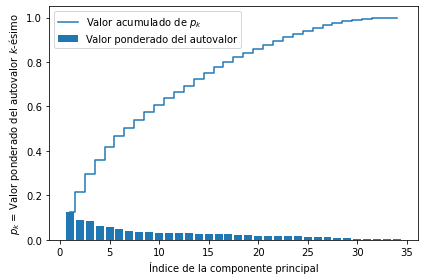

In [40]:
# Sumamos todos los autovalores
tot = sum(eigen_vals)
# Para cada autovalor ordenado de mayor a menor, calculamos su valor ponderado con tot
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
# cum_var_exp va almacenando la suma de las componentes de var_exp (ver siguiente celda)
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,35), var_exp, align='center',
        label='Valor ponderado del autovalor')
plt.step(range(1,35), cum_var_exp, where='mid',
         label='Valor acumulado de $p_k$')
plt.ylabel('$p_k$ = Valor ponderado del autovalor $k$-ésimo')
plt.xlabel('Índice de la componente principal')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Vemos que con 2 autovalores conseguimos algo más del 20% de los valores ponderados. Creemos la matriz de proyección con 36 filas y 2 columnas, asociada a los 2 primeros autovalores.

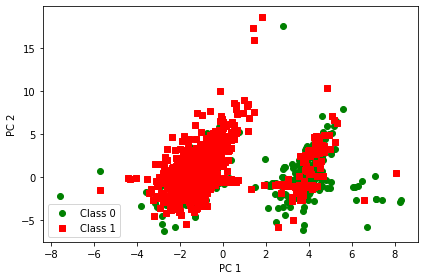

In [41]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eingenvalue, eigenvector) tuples from high to low 
eigen_pairs.sort(key= lambda k: k[0], reverse=True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))

# En la matriz X_train_pca recogemos la proyección de todos los datos 
# de entrenamiento usando la función .dot que nos permite hacer el 
# producto escalar de X_train_std y W de una forma eficiente y sencilla.
X_train_pca = X_train_std.dot(w)
# Ahora queremos ver los datos de entrenamiento
# proyectados en las componentes principales PC1 y PC2

colors = ['g', 'r', 'b']
markers = ['o', 's', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l, 1],
                c=c, label =f'Class {l}', marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

Vamos a pedirle a Scikit-learn que aplique la técnica PCA, usando el clasificador LogisticRegression y teniendo en cuenta solamente las dos componentes principales (n_components = 2).

El porcentaje de acierto con la reducción de dimensionalidad es:  78.304 %


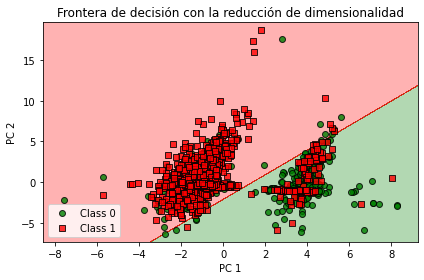

In [42]:

# Debemos importar el modulo pdr_script que corresponde
# al fichero de python pdr_script.py que está escrito
# con spider. Este fichero contiene la función
# plot_decision_regions que debe ser llamada con 
# la dot notation, esto es, pdr_script.plot_decision_regions()
import pdr_script


from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
# Initializin the PCA transformer and logistic regression estimator:
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr',
                       random_state=1,
                       solver='lbfgs')
# dimensionality reduction:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
# fitting the logistic regression model on the reduced dataset:

lr.fit(X_train_pca, y_train)

# Calculemos el porcentaje de acierto con la reducción de dimensionalidad
y_pred=lr.predict(X_test_pca)
a=0 #Contador
for i in range(len(y_pred)):
    if y_pred[i]==y_test[i]:
        a+=1
print("El porcentaje de acierto con la reducción de dimensionalidad es: ",round(100*a/len(y_pred),3),"%")

pdr_script.plot_decision_regions(X_train_pca, y_train, classifier = lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.title('Frontera de decisión con la reducción de dimensionalidad')
plt.tight_layout()
plt.show()

Ahora queremos ver cómo actúa la reducción de orden en los datos test.

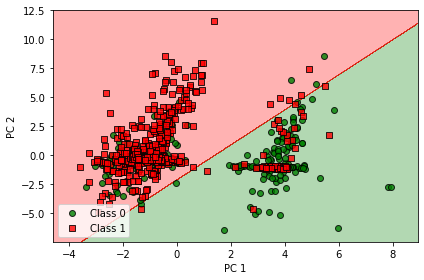

El porcentaje de acierto sobre los casos test es:  78.3 %


In [43]:

pdr_script.plot_decision_regions(X_test_pca, y_test, classifier = lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

# Calculemos el porcentaje de acierto
y_pred=lr.predict(X_test_pca)
a=0 # contador
for i in range(len(y_pred)):
    if y_pred[i]==y_test[i]:
        a+=1
print('El porcentaje de acierto sobre los casos test es: ',round(100*a/len(y_pred),2),'%')


Observamos que los resultados de acierto en ambos grupos son prácticamente idénticos.

Ahora empleamos Scikit-learn obteniendo los autovalores ponderados. Usamos la clase PCA con el parámetro n_components = None para que nos muestre los autovalores ponderados de mayor a menor tamaño.

In [44]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.1268902 , 0.08770921, 0.08312743, 0.06332762, 0.05661963,
       0.04765891, 0.03940386, 0.03532954, 0.03382934, 0.03162735,
       0.03034641, 0.02930821, 0.02882525, 0.02819344, 0.0273527 ,
       0.02579064, 0.02442771, 0.02177855, 0.01952113, 0.01905313,
       0.01766565, 0.01668073, 0.01615112, 0.01536574, 0.01385316,
       0.01324081, 0.01173032, 0.01017341, 0.00870195, 0.0048253 ,
       0.00445257, 0.0035068 , 0.00193416, 0.00159802])

Vemos cuál es la contribución de cada una de las diferentes features del dataset con los componentes principales que hemos seleccionado.

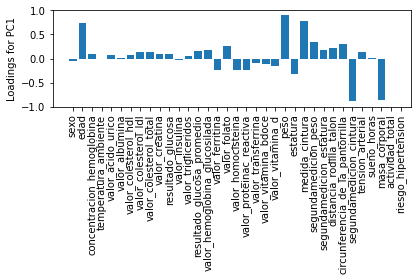

In [45]:
loadings = eigen_vecs * np.sqrt(eigen_vals)
fig, ax = plt.subplots()
ax.bar(range(34), loadings[:, 0], align='center')
# Queremos visualizar la correlación de las features
# con la componente principal PC1, esto se corresponde a
# los datos de la primera columna de la matriz loadings
ax.set_ylabel('Loadings for PC1')
ax.set_xticks(range(35))
ax.set_xticklabels(df.columns[1:], rotation = 90)
plt.ylim([-1,1])
plt.tight_layout()
plt.show()

Observamos que la edad, el peso(o masa corporal), asi como la medida de la cintura (estrechamente relacionada con el peso) son muy relevantes para padecer riesgo de sufrir hipertensión. Llama la atención que tanto la actividad total como la tensión arterial tienen muy poca relevancia, cercana a nula. Esto va en contra al análisis hecho al comienzo del trabajo. Esta diferencia puede que ocurra debido a que estas 2 características contengan información no relacionada con la masa corporal, mientras que el peso y la medida de la cintura están ralacionadas con esta.

Empleamos Scikit-learn para que realice el mismo trabajo que la celda anterior, y vemos que es idéntico.

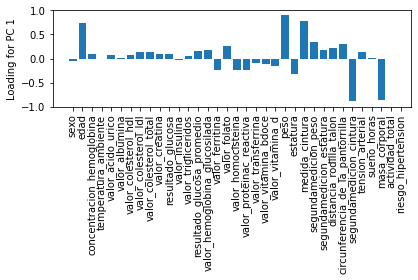

In [46]:
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig, ax = plt.subplots()
ax.bar(range(34), sklearn_loadings[:, 0], align='center')
ax.set_ylabel('Loading for PC 1')
ax.set_xticks(range(35))
ax.set_xticklabels(df.columns[1:], rotation = 90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

Realicemos este mismo análisis pero ahora variando el porcentaje de los casos test de casos test, a ver si así se mejora la precisión del clasificador.

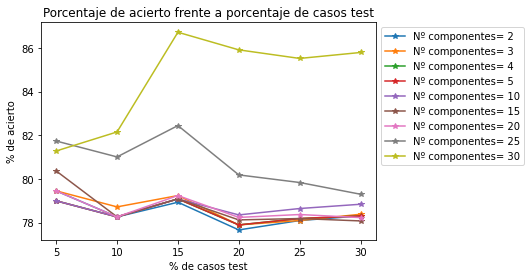

In [47]:
pc=[5,10,15,20,25,30]

nc=[2,3,4,5,10,15,20,25,30] # número de componentes
for k in range(len(nc)):
    acierto=[]
    for j in range(len(pc)):
        # Dividimos los datos
        X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=0.05*(j+1), 
                                 stratify=y, 
                                 random_state=0)
        # standarize the features
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_train_std = sc.fit_transform(X_train)
        X_test_std = sc.transform(X_test)

        # Utilizamos scikit-learn para hacer los cáculos

        pca = PCA(n_components=nc[k])
        lr = LogisticRegression(multi_class='ovr',
                               random_state=1,
                               solver='lbfgs')
        # dimensionality reduction:
        X_train_pca = pca.fit_transform(X_train_std)
        X_test_pca = pca.transform(X_test_std)
        # fitting the logistic regression model on the reduced dataset:

        lr.fit(X_train_pca, y_train)

        # Calculemos el porcentaje de acierto con la reducción de dimensionalidad
        y_pred=lr.predict(X_test_pca)
        a=0 #Contador
        for i in range(len(y_pred)):
            if y_pred[i]==y_test[i]:
                a+=1
        acierto.append(100*a/len(y_pred))
    
    
    plt.plot(pc,acierto,'*-',label=f'Nº componentes= {nc[k]:.0f}')
plt.xlabel('% de casos test')
plt.ylabel('% de acierto')
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.title('Porcentaje de acierto frente a porcentaje de casos test')
plt.show()

Vemos que la precisión al variar el número de componentes de 2 a 20 varía como máximo un 2 porciento. Si aumentamos este número hasta 25 y 30 la mejoría es mayor. El máximo de precisión (en este ejemplo) se alcanza con 30 compoentntes y un 15% de casos test; pero aplicar PCA y quedarse con 30 valores principales de 34 no es el objetivo del método, si no que es quedarse con un número bajo de estos, y en la gráfica se aprecia que la diferencia de tomar 2 a 5 valores principales es ínfima.

## 5. Análisis de modelos y ajuste de hiperparámetros

### 5.1. Seleccionamos datos de entrenamiento (80%) y datos test (20%)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2,
                         random_state=0)

### 5.2. Modificando la base de datos de una forma global

A diferencia de los apartados anteriores, vamos a seguir un proceso global que, en el contexto de Machine Learning, se llama "combinación de transformadores y estimadores en una pipeline" y sirve para hacer modificaciones en la base de datos. Habrá dos procesos, los llamados transformadores (usan fit y transform) y los llamados estimadores (usan fit y predict). Utilizaremos una pipeline concreta que se basa en las siguientes premisas:
1. Queremos estandarizar los datos ===> importamos StandarScaler
2. Queremos reducir la dimensionalidad ===> importamos PCA
3. Queremos un clasifiacador lineal ===> importamos LogisticRegression
4. Queremos que se procesen los datos de entrenamiento y seguidamente los de test ===> importamos make_pipeline

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression())

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
test_accuracy = pipe_lr.score(X_test, y_test)
print(f'Precisión del test: {100*test_accuracy:.2f} %')

Precisión del test: 77.43 %


### 5.3. Evaluación del rendimiento de un modelo

Vamos a utilizar el método de validación cruzada haciendo uso de la función cross_val_score de la librería scikit-learn.

In [50]:
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(estimator=pipe_lr,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             n_jobs=1)
# Cuidado con el parámetro n_jobs pues indica cuántas CPUs
# de nuestroordenador queremos que se dediquen a hacer los
# cálculos.
print(f'Resultados de la validación cruzada:\n {resultados}')
print()
print(f'Precisión de la validación cruzada = {np.mean(resultados):.3f} '
      f'+/- {np.std(resultados):.3f}')

Resultados de la validación cruzada:
 [0.77936963 0.7965616  0.78796562 0.7965616  0.75071633 0.77077364
 0.75071633 0.77936963 0.77936963 0.77363897]

Precisión de la validación cruzada = 0.777 +/- 0.015


### 5.4. Métodos de depuración de algoritmos

Vamos a ver 2 formas de depurar algoritmos, es decir, vamos a ver si tenemos problemas de underfitting u overfitting. Las 2 maneras son: curvas de aprendizaje y curvas de validación.

#### 5.4.1 Curvas de aprendizaje

Damos uso a la función de Scikit-learn learning_curve. El estudio se centra en la cantidad de datos de entrenamiento y test.

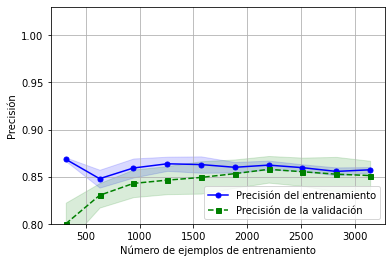

In [51]:
from sklearn.model_selection import learning_curve
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2',
                                           max_iter=10000))
train_sizes, train_scores, test_scores = \
            learning_curve(estimator=pipe_lr,
                           X=X_train,
                           y=y_train,
                           train_sizes=np.linspace(0.1,1.0,10),
                           cv=10, n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker='o',
         markersize=5, label='Precisión del entrenamiento')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Precisión de la validación')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Número de ejemplos de entrenamiento')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.ylim([0.7, 1.03])
plt.show()

Parece que no hay probelamas ni de overfitting ni de underfitting ya que la precisión sobre los casos test y de entrenamiento tienden juntarse. 

#### 5.4.2. Curvas de validación

Esta vez usamos la función validation_curve de la librería Scikit-learn. En este caso tomamos como __referencia el parámetro C, el inverso del parámtro de regularizción__.

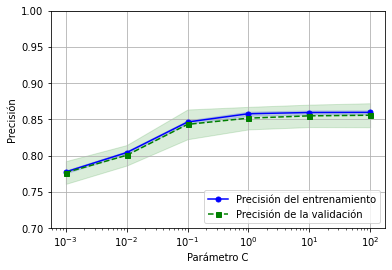

In [52]:
from sklearn.model_selection import validation_curve
rango_parametros = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = \
            validation_curve(estimator=pipe_lr,
                             X=X_train,
                             y=y_train,
                             param_name='logisticregression__C',
                             param_range=rango_parametros,
                             cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(rango_parametros, train_mean, color='blue', marker='o',
          markersize=5, label='Precisión del entrenamiento')
plt.fill_between(rango_parametros, train_mean + train_std,
                 train_mean - train_std, alpha=0.15, color='blue')
plt.plot(rango_parametros, test_mean, color='green', linestyle='--',
          marker='s', markersize=5, label='Precisión de la validación')
plt.fill_between(rango_parametros, test_mean + test_std,
                 test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parámetro C')
plt.ylabel('Precisión')
plt.ylim([0.7, 1.0])
plt.show()

Volvemos a ver que no parece existir ningún problema de overfitting o underfitting.

### 5.5. Matrices de confusión

En las matrices de confusión se miran los casos que se clasificaron bien y mal de ambas clases por separado, es decir, se mira los verdaderos positivos de riesgo de ipertensión (TP), los falsos positivos (FP), los verdaderos negativos (TN) y los falsos negativos (FN). Esto ya se miró en el perceptrón, el adaline y el Logistic Regression. Ahora lo miraremos con el resto de algoritmos. Los casos que trataremos son los que mejor resultado dieron (con los datos de las características más relevantes, la masa corporal y la actividad total).

La matriz de confusión la calculará la función confusion_matrix de la librería sklearn.metrics.

In [69]:
# Separamos los datos
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.2,
                     random_state=0,
                     stratify=y)
X_train_std = stdc.fit_transform(X_train[:,k2])
X_test_std = stdc.fit_transform(X_test[:,k2])

# Importamos la función de la matriz de confusión
from sklearn.metrics import confusion_matrix

# SVM no lineal
SVM = SVC(kernel='rbf', random_state=1, gamma=0.25, C=1)
SVM.fit(X_train_std, y_train)
y_pred_SVM=SVM.predict(X_test_std)
# Árboles de decisión
tree_model = DecisionTreeClassifier(criterion='gini',
                                        max_depth=2,
                                        random_state=1)

tm=tree_model.fit(X_train_std, y_train)
y_pred_tm=tm.predict(X_test_std)
# k-neighbours
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train)
y_pred_knn =  knn.predict(X_test_std)

# Calculemos las matrices de confusión

matriz_de_confusion_SVM = confusion_matrix(y_true=y_test, y_pred=y_pred_SVM)
print("La matriz de confusión de SVM es\n ", matriz_de_confusion_SVM)

print('TP= ',matriz_de_confusion_SVM[1,1])
print('TN= ',matriz_de_confusion_SVM[0,0])
print('FP= ',matriz_de_confusion_SVM[0,1])
print('FN= ',matriz_de_confusion_SVM[1,0])

matriz_de_confusion_tm = confusion_matrix(y_true=y_test, y_pred=y_pred_tm)
print("La matriz de confusión del árbol de decisión es\n ", matriz_de_confusion_tm)

print('TP= ',matriz_de_confusion_tm[1,1])
print('TN= ',matriz_de_confusion_tm[0,0])
print('FP= ',matriz_de_confusion_tm[0,1])
print('FN= ',matriz_de_confusion_tm[1,0])

matriz_de_confusion_knn = confusion_matrix(y_true=y_test, y_pred=y_pred_knn)
print("La matriz de confusión de k-neighbours es\n ", matriz_de_confusion_knn)

print('TP= ',matriz_de_confusion_knn[1,1])
print('TN= ',matriz_de_confusion_knn[0,0])
print('FP= ',matriz_de_confusion_knn[0,1])
print('FN= ',matriz_de_confusion_knn[1,0])



La matriz de confusión de SVM es
  [[255  55]
 [ 28 535]]
TP=  535
TN=  255
FP=  55
FN=  28
La matriz de confusión del árbol de decisión es
  [[277  33]
 [ 32 531]]
TP=  531
TN=  277
FP=  33
FN=  32
La matriz de confusión de k-neighbours es
  [[274  36]
 [ 34 529]]
TP=  529
TN=  274
FP=  36
FN=  34


Vemos que el algoritmo que menos falla en clasificar los caso con riesgo es SVM.

## 6. Conclusiones

Hemos hecho un anális de distintos algoritmos de clasifición sobre una base de datos para diferenciar entre casos que tienen riesgo de padecer hipertensión y casos que no. Lo primero que hicimos fue ver qué características son las más importantes para poder clasificar bien los datos, y vimos que se trataban de la masa corporal y de la actividad total (lo cual parece lógico). 

Con los datos de estas 2 características probamos algoritmos propios de los clasificadores perceptrón, adaline y logistic regression, y algoritmos de la librería Scikit-Learn como perceptrón, logistic regression, SVM (lineal y no lineal), árboles de decisión y k-neighbours. Comparando los resultados de los clasificadores propios con sus símiles de la librería llama la atención que mientras que para logistic regression el resultado es idéntico, para el perceptrón el resultado es mejor con el algoritmo propio que con el de la librería. Esta discrepancia no la sabemos explicar.

De todos los algoritmos probados, el que mejor clasifica todos los datos es el árbol de decisión con una precisión de 92.55%; aunque si nos fijamos en los errores que cometen al diagnosticar los casos que sabemos que son positivos, es decir, aquellos que tienen riesgo de sufrir hipertensión, el mejor es el SVM, con un error del 4,97%. Además, si tuviésemos en cuenta todas las features, de los algoritmos SVM, árbol de decisión y k-neighbours, el único que mejora su predicción es el árbol de decisión (95,76% de acierto).

Luego, aplicamos una reducción de dimensionalidad, y aplicando Logistic Regression haría falta un gran número de componentes principales para mejorar la predicción hecha tomando únicamente la informacion de las dos características antes mencionadas, lo que es contraproducente.

Concluyendo, hemos visto que ningún clasificador es perfecto, lo cual ya se sabe, y que el mejor para diagnosticar los casos de riesgo reales es el SVM.